In [1]:
import numpy as np
from phimal_utilities.analysis import load_tensorboard

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper', style='white')

In [2]:
df_deepmod = load_tensorboard('runs/deepmod_long/')
df_logprob = load_tensorboard('runs/logprob_long/')
df_lstsq = load_tensorboard('runs/lstsq_long/')

/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [3]:
df_lstsq.keys()

Index(['Total_loss', 'MSE_0', 'Regression_0', 'L1_0', 'coeff_0_0', 'coeff_0_1',
       'coeff_0_2', 'coeff_0_3', 'coeff_0_4', 'coeff_0_5', 'coeff_0_6',
       'coeff_0_7', 'coeff_0_8', 'coeff_0_9', 'coeff_0_10', 'coeff_0_11',
       'scaled_coeff_0_0', 'scaled_coeff_0_1', 'scaled_coeff_0_2',
       'scaled_coeff_0_3', 'scaled_coeff_0_4', 'scaled_coeff_0_5',
       'scaled_coeff_0_6', 'scaled_coeff_0_7', 'scaled_coeff_0_8',
       'scaled_coeff_0_9', 'scaled_coeff_0_10', 'scaled_coeff_0_11',
       'log_likelihood', 'll_fit', 'mae_library_0', 'mae_library_1',
       'mae_library_2', 'mae_library_3', 'mae_library_4', 'mae_library_5',
       'mae_library_6', 'mae_library_7', 'mae_library_8', 'mae_library_9',
       'mae_library_10', 'mae_library_11', 'mae_time_deriv'],
      dtype='object')

In [4]:
coeff_keys = [key for key in df_deepmod.keys() if key[:5]=='coeff']
scaled_coeff_keys = [key for key in df_deepmod.keys() if key[:6]=='scaled']
lst_keys = [key for key in df_deepmod.keys() if key[:5]=='lstsq']
mae_keys = [key for key in df_lstsq.keys() if key[:3]=='mae']

In [5]:
true_coeffs = np.zeros((1, 12))
true_coeffs[0, 2] = 0.1
true_coeffs[0, 5] = -1.0

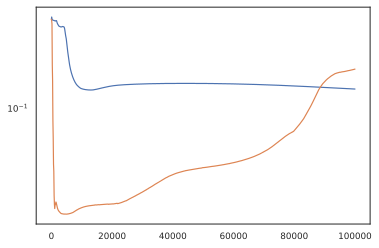

In [6]:
%config InlineBackend.figure_format = 'svg'
plt.semilogy(df_deepmod.index, np.mean(df_deepmod[mae_keys], axis=1))
plt.semilogy(df_deepmod.index, np.mean(df_lstsq[mae_keys], axis=1))

#plt.xscale('log')

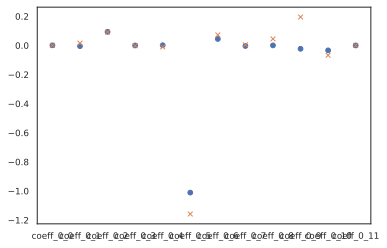

In [7]:
plt.plot(df_lstsq.loc[87000][coeff_keys], 'o', label='deepest')
plt.plot(df_lstsq.loc[2800][coeff_keys], 'x', label='local')

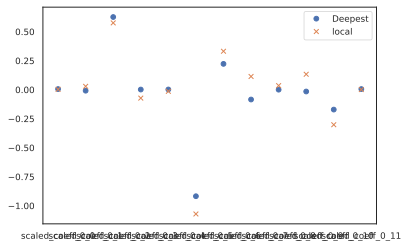

In [8]:
plt.plot(df_lstsq.loc[87000][scaled_coeff_keys], 'o', label='Deepest')
plt.plot(df_lstsq.loc[2800][scaled_coeff_keys], 'x', label='local')

plt.legend()

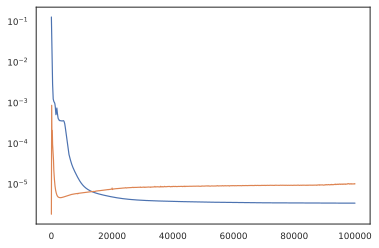

In [9]:
plt.semilogy(df_deepmod.index, df_deepmod['Regression_0'], label='Log. prob.')
plt.semilogy(df_lstsq.index, df_lstsq['Regression_0'], label='Lst. sq.')

#plt.xscale('log')

In [10]:
np.min(df_deepmod['Regression_0'])

3.438508201725199e-06

In [11]:
np.min(df_lstsq['Regression_0'][1:])

4.688818989961874e-06

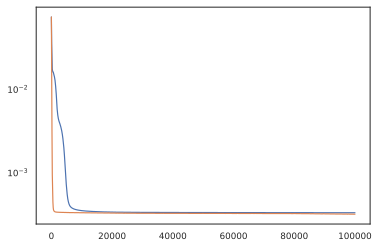

In [12]:
plt.semilogy(df_deepmod.index, df_deepmod['MSE_0'], label='Log. prob.')
plt.semilogy(df_lstsq.index, df_lstsq['MSE_0'], label='Lst. sq.')

#plt.xscale('log')

(1, 2.5)

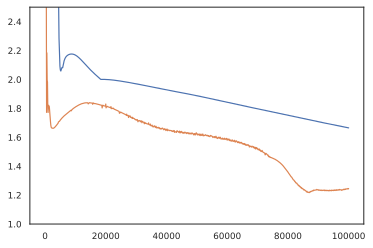

In [13]:
plt.plot(df_deepmod.index, np.sum(np.abs(df_deepmod[coeff_keys]), axis=1))
plt.plot(df_lstsq.index, np.sum(np.abs(df_lstsq[coeff_keys]), axis=1))

plt.ylim([1, 2.5])

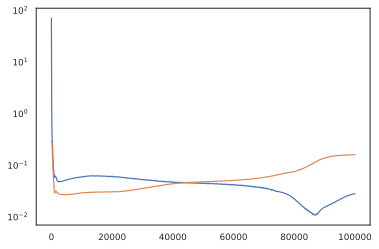

In [14]:
%config InlineBackend.figure_format = 'svg'
plt.semilogy(df_deepmod.index, np.mean(np.abs(df_lstsq[coeff_keys] - true_coeffs), axis=1))
plt.semilogy(df_deepmod.index, np.mean(df_lstsq[mae_keys], axis=1), label='Log. prob.')

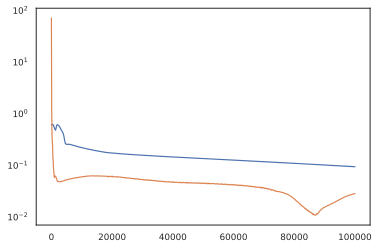

In [15]:
plt.semilogy(df_deepmod.index, np.mean(np.abs(df_deepmod[coeff_keys] - true_coeffs), axis=1))
plt.semilogy(df_deepmod.index, np.mean(np.abs(df_lstsq[coeff_keys] - true_coeffs), axis=1))

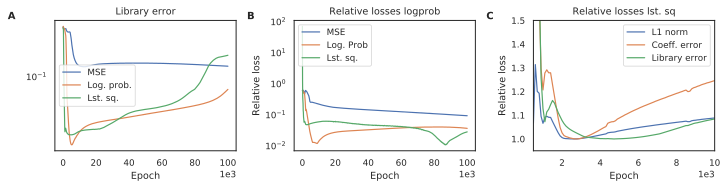

In [16]:
%config InlineBackend.figure_format = 'svg'

fig, axes = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=3, constrained_layout=True) #5.5 is official width

# Left panel
ax = axes[0]
ax.semilogy(df_deepmod.index, np.mean(df_deepmod[mae_keys], axis=1), label='MSE')
ax.semilogy(df_deepmod.index, np.mean(df_logprob[mae_keys], axis=1), label='Log. prob.')
ax.semilogy(df_deepmod.index, np.mean(df_lstsq[mae_keys], axis=1), label='Lst. sq.')
ax.legend()

ax.set_yscale('log')
ax.set_title('Library error')
ax.set_xlabel('Epoch')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
ax.text(-0.26, 1.01, 'A', transform=ax.transAxes, weight='bold')

# Middle panel
ax = axes[1]

ax.plot(df_deepmod.index, np.mean(np.abs(df_deepmod[coeff_keys] - true_coeffs), axis=1), label='MSE')
ax.plot(df_deepmod.index, np.mean(np.abs(df_logprob[coeff_keys] - true_coeffs), axis=1), label='Log. Prob')
ax.plot(df_deepmod.index, np.mean(np.abs(df_lstsq[coeff_keys] - true_coeffs), axis=1), label='Lst. sq.')

ax.legend(loc='upper left')
#ax.set_ylim([0.95, 1.5])
ax.set_yscale('log')
ax.set_title('Relative losses logprob')
ax.set_xlabel('Epoch')
ax.set_ylabel('Relative loss')
#ax.set_xlim([500, 10000])
ax.text(-0.26, 1.01, 'B', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
#ax.set_ylim([3e-4, 4e-4])



# Right panel
ax = axes[2]
normed_l1 = np.sum(np.abs(df_lstsq[coeff_keys]), axis=1) / np.min(np.sum(np.abs(df_lstsq[coeff_keys]), axis=1).loc[1:10000])
normed_coeff_error = np.mean(np.abs(df_lstsq[coeff_keys] - true_coeffs), axis=1) / np.min(np.mean(np.abs(df_lstsq[coeff_keys] - true_coeffs), axis=1).loc[1:10000])
normed_lib_error = np.mean(df_lstsq[mae_keys], axis=1) / np.min(np.mean(df_lstsq[mae_keys], axis=1).loc[1:])

#ax.plot(df_logprob.index, df_lstsq['Regression_0']/df_lstsq['Regression_0'].loc[1:].min(), label='Reg.')
ax.plot(df_logprob.index, normed_l1, label='L1 norm')
ax.plot(df_lstsq.index, normed_coeff_error, label='Coeff. error')
ax.plot(df_lstsq.index, normed_lib_error, label='Library error')

ax.legend(loc='upper right')
ax.set_ylim([0.95, 1.5])
#ax.set_yscale('log')
ax.set_title('Relative losses lst. sq')
ax.set_xlabel('Epoch')
ax.set_ylabel('Relative loss')
ax.set_xlim([500, 10000])
ax.text(-0.26, 1.01, 'C', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
#ax.set_ylim([3e-4, 4e-4])



fig.show()
plt.savefig('figure_3.pdf')

In [20]:
np.argmin(np.mean(np.abs(df_logprob[coeff_keys] - true_coeffs), axis=1))

8800

In [34]:
np.argmin(np.mean(np.abs(df_lstsq[coeff_keys] - true_coeffs), axis=1).loc[:10000])

2800

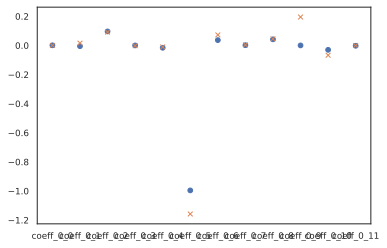

In [30]:
plt.plot(df_logprob[coeff_keys].loc[8800], 'o')
plt.plot(df_lstsq[coeff_keys].loc[2800], 'x')

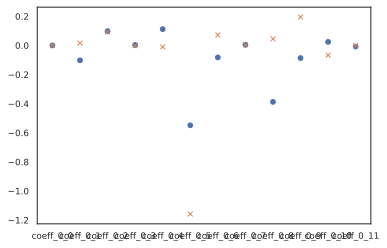

In [31]:
plt.plot(df_logprob[coeff_keys].loc[2800], 'o')
plt.plot(df_lstsq[coeff_keys].loc[2800], 'x')



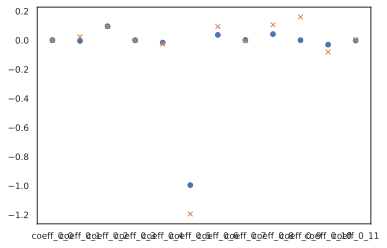

In [35]:
plt.plot(df_logprob[coeff_keys].loc[8800], 'o')
plt.plot(df_lstsq[coeff_keys].loc[8800], 'x')


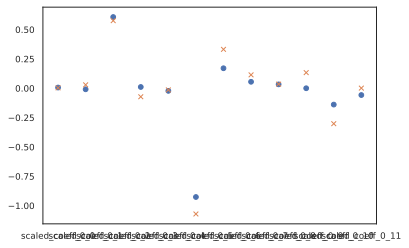

In [36]:
plt.plot(df_logprob[scaled_coeff_keys].loc[8800], 'o')
plt.plot(df_lstsq[scaled_coeff_keys].loc[2800], 'x')

In [ ]:

plt.plot(df_logprob[coeff_keys].loc[2800], 'o')
plt.plot(df_lstsq[coeff_keys].loc[2800], 'x')



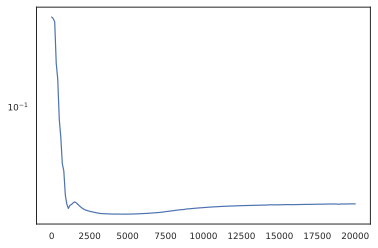

In [24]:
plt.semilogy(df_logprob.index, np.mean(df_lstsq[mae_keys], axis=1), label='MAE Libray')

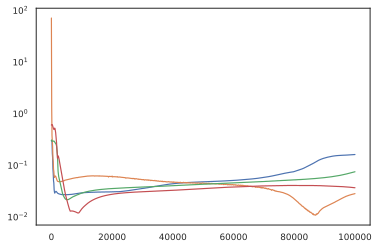

In [161]:
plt.semilogy(df_logprob.index, np.mean(df_lstsq[mae_keys], axis=1), label='Lst. sq.')
plt.semilogy(df_logprob.index, np.mean(np.abs(df_lstsq[coeff_keys] - true_coeffs), axis=1), label='Lst. sq.')



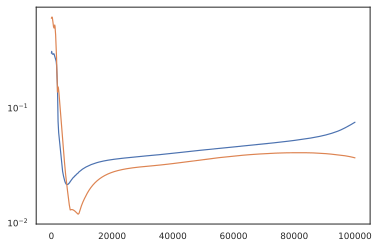

In [162]:
plt.semilogy(df_logprob.index, np.mean(df_logprob[mae_keys], axis=1), label='Lst. sq.')
plt.semilogy(df_logprob.index, np.mean(np.abs(df_logprob[coeff_keys] - true_coeffs), axis=1), label='Lst. sq.')

In [46]:
np.argmin(np.mean(df_lstsq[mae_keys], axis=1))

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


4700

In [47]:
np.argmin(np.mean(np.abs(df_lstsq[coeff_keys] - true_coeffs), axis=1))

2800

In [49]:
np.argmin(df_lstsq['Regression_0'][1:])

2900

In [87]:
normed_l1 = np.sum(np.abs(df_lstsq[coeff_keys]), axis=1)[1:] / np.min(np.sum(np.abs(df_lstsq[scaled_coeff_keys]), axis=1)[1:])
normed_coeff_error = np.mean(np.abs(df_lstsq[coeff_keys] - true_coeffs), axis=1)[1:] / np.min(np.mean(np.abs(df_lstsq[coeff_keys] - true_coeffs), axis=1)[1:])

normed_lib_error = np.mean(df_lstsq[mae_keys], axis=1)[1:] / np.min(np.mean(df_lstsq[mae_keys], axis=1)[1:])

(0.9, 1.5)

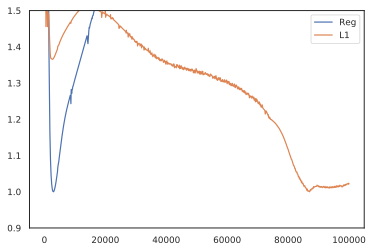

In [88]:

#plt.plot(df_logprob.index[1:], normed_lib_error, label='MAE Libray')


#plt.plot(df_logprob.index[1:], normed_coeff_error, label='MAE Coeff')
plt.plot(df_logprob.index[1:], df_lstsq['Regression_0'][1:]/df_lstsq['Regression_0'][1:].min(), label='Reg')
plt.plot(df_logprob.index[1:], normed_l1, label='L1')

#plt.xscale('log')
plt.legend()
plt.ylim([0.9, 1.5])

(-2, 2)

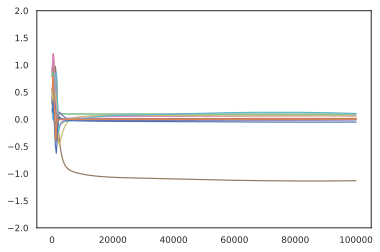

In [156]:
plt.plot(df_deepmod.index, df_logprob[coeff_keys])
#plt.plot(df_deepmod.index, df_logprob[lst_keys], '--')


plt.ylim([-2, 2])

(-2, 2)

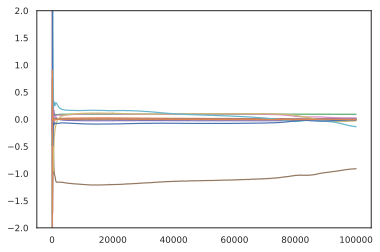

In [158]:
plt.plot(df_deepmod.index, df_lstsq[coeff_keys])
#plt.plot(df_deepmod.index, df_logprob[lst_keys], '--')


plt.ylim([-2, 2])

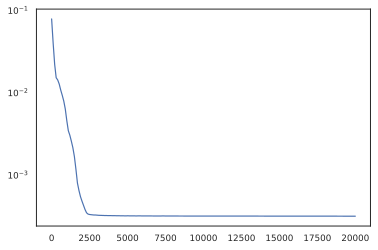

In [39]:
plt.semilogy(df_deepmod.index, df_logprob['MSE_0'])

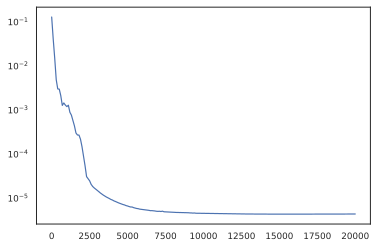

In [46]:
plt.semilogy(df_deepmod.index, df_logprob['Regression_0'])

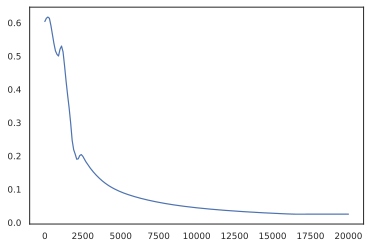

In [50]:
plt.plot(df_logprob.index, np.mean(np.abs(df_logprob[coeff_keys] - true_coeffs), axis=1), label='Log. prob.')

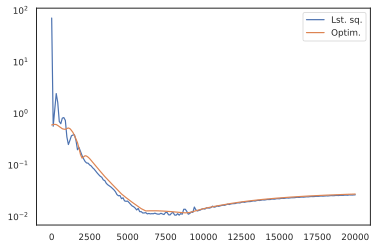

In [29]:
plt.semilogy(df_logprob.index, np.mean(np.abs(df_logprob[lst_keys] - true_coeffs), axis=1), label='Lst. sq.')
plt.semilogy(df_logprob.index, np.mean(np.abs(df_logprob[coeff_keys] - true_coeffs), axis=1), label='Optim.')
#plt.ylim([1e-2, 1])

plt.legend()

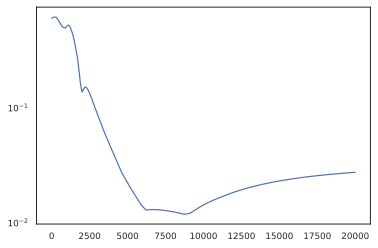

In [28]:
plt.semilogy(df_logprob.index, np.mean(np.abs(df_logprob[coeff_keys] - true_coeffs), axis=1), label='Optim.')

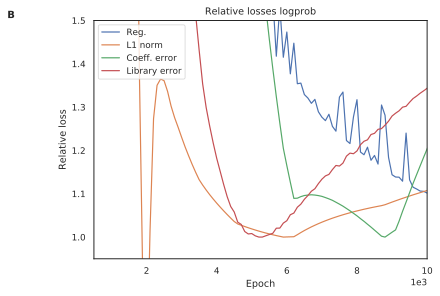

In [146]:
# Right panel
fig, ax = plt.subplots( nrows=1, ncols=1, constrained_layout=True) #5.5 is official width



normed_l1 = np.sum(np.abs(df_logprob[coeff_keys]), axis=1) / np.min(np.sum(np.abs(df_logprob[coeff_keys]), axis=1).loc[3000:])
normed_coeff_error = np.mean(np.abs(df_logprob[coeff_keys] - true_coeffs), axis=1) / np.min(np.mean(np.abs(df_logprob[coeff_keys] - true_coeffs), axis=1).loc[1:])
normed_lib_error = np.mean(df_logprob[mae_keys], axis=1) / np.min(np.mean(df_logprob[mae_keys], axis=1).loc[1:])

ax.plot(df_logprob.index, df_logprob['Regression_0']/df_logprob['Regression_0'].loc[1:].min(), label='Reg.')
ax.plot(df_logprob.index, normed_l1, label='L1 norm')
ax.plot(df_lstsq.index, normed_coeff_error, label='Coeff. error')
ax.plot(df_lstsq.index, normed_lib_error, label='Library error')

ax.legend(loc='upper left')
ax.set_ylim([0.95, 1.5])
#ax.set_yscale('log')
ax.set_title('Relative losses logprob')
ax.set_xlabel('Epoch')
ax.set_ylabel('Relative loss')
ax.set_xlim([500, 10000])
ax.text(-0.26, 1.01, 'B', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
#ax.set_ylim([3e-4, 4e-4])

In [ ]:
# Right panel
ax = axes[2]
normed_l1 = np.sum(np.abs(df_lstsq[scaled_coeff_keys]), axis=1) / np.min(np.sum(np.abs(df_lstsq[scaled_coeff_keys]), axis=1).loc[1:10000])
normed_coeff_error = np.mean(np.abs(df_lstsq[coeff_keys] - true_coeffs), axis=1) / np.min(np.mean(np.abs(df_lstsq[coeff_keys] - true_coeffs), axis=1).loc[1:10000])
normed_lib_error = np.mean(df_lstsq[mae_keys], axis=1) / np.min(np.mean(df_lstsq[mae_keys], axis=1).loc[1:])

ax.plot(df_logprob.index, df_lstsq['Regression_0']/df_lstsq['Regression_0'].loc[1:].min(), label='Reg.')
ax.plot(df_logprob.index, normed_l1, label='L1 norm')
ax.plot(df_lstsq.index, normed_coeff_error, label='Coeff. error')
ax.plot(df_lstsq.index, normed_lib_error, label='Library error')


# Multiple runs

In [2]:
import numpy as np
from phimal_utilities.analysis import load_tensorboard
from os import listdir
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper', style='white')


In [48]:
def collect_runs(ID, true_coeffs):
    files = [file for file in listdir('runs') if file[:len(ID)] == ID] #getting and sorting files
    files.sort()
    print(files)
    dfs = [load_tensorboard('runs/' + file + '/') for file in files] #dfs is list of dataframes of all runs
    
    df_plot = pd.DataFrame(index=dfs[0].index) #df used to store results in
    
    # Setting MSE and Reg properties
    MSE = np.log10(np.stack([df['MSE_0'] for df in dfs], axis=1)) # take mean of log ipv log of mean for visualization purposes
    Reg = np.log10(np.stack([df['Regression_0'] for df in dfs], axis=1))
    Total = np.log10(np.stack([df['Regression_0'] + df['MSE_0'] for df in dfs], axis=1))
    
    df_plot['MSE_mean'] = np.mean(MSE, axis=1)
    df_plot['MSE_std'] = np.std(MSE, axis=1)
    df_plot['Reg_mean'] = np.mean(Reg, axis=1)
    df_plot['Reg_std'] = np.std(Reg, axis=1)
    df_plot['total_mean'] = np.mean(Total, axis=1)
    df_plot['total_std'] = np.std(Total, axis=1)
    
    # Coefficient error 
    coeff_keys = [key for key in dfs[0].keys() if key[:5]=='coeff']
    coeff_errors = np.log10(np.stack([np.mean(np.abs(df[coeff_keys] - true_coeffs), axis=1) for df in dfs], axis=1))
    df_plot['Coeff_mean'] = np.mean(coeff_errors, axis=1)
    df_plot['Coeff_std'] = np.std(coeff_errors, axis=1)
    
    # Least squares error
    lst_keys = [key for key in dfs[0].keys() if key[:5]=='lstsq']
    if len(lst_keys) != 0:
        # Coeff Errors 
        coeff_errors = np.stack([np.mean(np.abs(df[lst_keys] - true_coeffs), axis=1) for df in dfs], axis=1) #mean over coeffs
        df_plot['lstsq_coeff_mean'] = np.mean(coeff_errors, axis=1) # means over runs
        df_plot['lstsq_coeff_std'] = np.std(coeff_errors, axis=1)
        
        # l1 distance 
        coeff_errors = np.log10(np.stack([np.mean(np.abs(df[lst_keys].to_numpy() - df[coeff_keys].to_numpy()), axis=1) for df in dfs], axis=1)) #mean over coeffs
        df_plot['l1_dist_mean'] = np.mean(coeff_errors, axis=1) # means over runs
        df_plot['l1_dist_std'] = np.std(coeff_errors, axis=1)    
    
    # Library error
    mae_keys = [key for key in dfs[0].keys() if key[:3]=='mae']
    lib_errors = np.stack([np.mean(np.abs(df[mae_keys]), axis=1) for df in dfs], axis=1) # mean over all coeffs
    df_plot['library_mean'] = np.mean(lib_errors, axis=1) # means over runs
    df_plot['library_std'] = np.std(lib_errors, axis=1)
    
    # L1 norm   
    coeff_errors = np.stack([np.mean(np.abs(df[coeff_keys] - true_coeffs), axis=1) for df in dfs], axis=1)
    df_plot['coeff_error_real'] = np.mean(coeff_errors, axis=1)
    l1_norm = np.stack([np.mean(np.abs(df[coeff_keys]), axis=1) for df in dfs], axis=1)
    df_plot['l1_norm'] = np.mean(l1_norm, axis=1)
        
    return df_plot

In [49]:
true_coeffs = np.zeros((1, 12))
true_coeffs[0, 2] = 0.1
true_coeffs[0, 5] = -1.0

In [50]:
df_deepmod = collect_runs('deepmod_run', true_coeffs=true_coeffs)
df_logprob = collect_runs('deepmod_logprob_run', true_coeffs=true_coeffs)
df_lstsq = collect_runs('deepmod_logprob_lstsq_run', true_coeffs=true_coeffs)

['deepmod_run_0', 'deepmod_run_1', 'deepmod_run_2', 'deepmod_run_3', 'deepmod_run_4']
['deepmod_logprob_run_0', 'deepmod_logprob_run_1', 'deepmod_logprob_run_2', 'deepmod_logprob_run_3', 'deepmod_logprob_run_4']
['deepmod_logprob_lstsq_run_0', 'deepmod_logprob_lstsq_run_1', 'deepmod_logprob_lstsq_run_2', 'deepmod_logprob_lstsq_run_3', 'deepmod_logprob_lstsq_run_4']


In [51]:
df_deepmod.keys()

Index(['MSE_mean', 'MSE_std', 'Reg_mean', 'Reg_std', 'total_mean', 'total_std',
       'Coeff_mean', 'Coeff_std', 'lstsq_coeff_mean', 'lstsq_coeff_std',
       'l1_dist_mean', 'l1_dist_std', 'library_mean', 'library_std',
       'coeff_error_real', 'l1_norm'],
      dtype='object')

In [137]:
import matplotlib.ticker


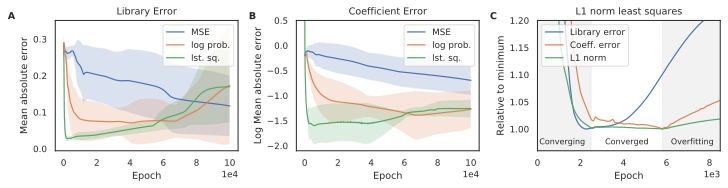

In [183]:
%config InlineBackend.figure_format = 'svg'

sns.set_context('paper')
sns.set_style('white')

fig, axes = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=3, constrained_layout=True) #5.5 is official width

# Left panel
ax = axes[0]
ax.fill_between(df_deepmod.index, df_deepmod['library_mean']-df_deepmod['library_std'], df_deepmod['library_mean']+df_deepmod['library_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['library_mean'], label='MSE')

ax.fill_between(df_deepmod.index, df_logprob['library_mean']-df_logprob['library_std'], df_logprob['library_mean']+df_logprob['library_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_logprob['library_mean'], label='log prob.')

ax.fill_between(df_deepmod.index, df_lstsq['library_mean']-df_lstsq['library_std'], df_lstsq['library_mean']+df_lstsq['library_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_lstsq['library_mean'], label='lst. sq.')

ax.legend()
#ax.set_ylim([-2.1, 0.5])
ax.set_title('Library Error')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean absolute error')
ax.text(-0.26, 1.01, 'A', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(4, 4))

# Middle panel
ax = axes[1]
ax.fill_between(df_deepmod.index, df_deepmod['Coeff_mean']-df_deepmod['Coeff_std'], df_deepmod['Coeff_mean']+df_deepmod['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['Coeff_mean'], label='MSE')

ax.fill_between(df_deepmod.index, df_logprob['Coeff_mean']-df_logprob['Coeff_std'], df_logprob['Coeff_mean']+df_logprob['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_logprob['Coeff_mean'], label='log prob.')

ax.fill_between(df_deepmod.index, df_lstsq['Coeff_mean']-df_lstsq['Coeff_std'], df_lstsq['Coeff_mean']+df_lstsq['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_lstsq['Coeff_mean'], label='lst. sq.')

ax.legend()
ax.set_ylim([-2.1, 0.5])
ax.set_title('Coefficient Error')
ax.set_xlabel('Epoch')
ax.set_ylabel('Log Mean absolute error')
ax.text(-0.26, 1.01, 'B', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(4, 4))

#ax.set_yticks([value for value in ax.get_yticks() if value.is_integer()]) # set y labels to log
#ax.set_yticklabels(['$10^{' + str(int(value)) + '}$' for value in ax.get_yticks()])

# Right panel
ax = axes[2]
lib_error_normalized = df_lstsq['library_mean'] / df_lstsq['library_mean'].min() 
coeff_error_normalized = df_lstsq['coeff_error_real'] / np.min(df_lstsq['coeff_error_real']) 
l1norm_normalized = df_lstsq['l1_norm'] / np.min(df_lstsq['l1_norm'])


ax.fill_between(df_deepmod.index[df_deepmod.index <= 2500], 0.96, 1.20, color='gray', alpha=0.1)
ax.fill_between(df_deepmod.index[df_deepmod.index >= 5800], 0.96, 1.20, color='gray', alpha=0.1)
#ax.fill_between(df_deepmod.index[(2500 <= df_deepmod.index) & (df_deepmod.index <= 5800)], 0.98, 1.20, color='yellow', alpha=0.1)
ax.plot(df_deepmod.index, lib_error_normalized, label='Library error')
ax.plot(df_deepmod.index, coeff_error_normalized, label='Coeff. error')
ax.plot(df_deepmod.index, l1norm_normalized, label='L1 norm')
#ax.axvline(df_lstsq['l1_norm'].idxmin(), linestyle='--', color='k')

ax.legend(loc='upper left')
ax.set_ylim([0.96, 1.2])
ax.set_xlim([0, 8500])
ax.set_title('L1 norm least squares')
ax.set_xlabel('Epoch')
ax.set_ylabel('Relative to minimum')
ax.text(-0.26, 1.01, 'C', transform=ax.transAxes, weight='bold')
ax.text(0.01, 0.05, 'Converging', transform=ax.transAxes, fontsize=8)
ax.text(0.37, 0.05, 'Converged', transform=ax.transAxes, fontsize=8)
ax.text(0.73, 0.05, 'Overfitting', transform=ax.transAxes, fontsize=8)
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))



fig.show()
plt.savefig('figure_3.pdf')

In [159]:
print(r'$10^\{ {} \}$'.format(1))

ValueError: unexpected '{' in field name

In [119]:
axes[1].get_yticks()[0].is_integer()

False

In [150]:
ax = axes[1]

[value for value in ax.get_yticks() if value.is_integer()]
['$10^{' + str(int(value)) + '}$' for value in ax.get_yticks()]

['$10^{-2}$', '$10^{-1}$', '$10^{0}$']

In [127]:
print(r'$e^{ax}$')

$e^{ax}$


In [122]:
[value for value in ax.get_yticks() if value.is_integer()]

[-2.0, -1.0, 0.0]

In [136]:
[f'10^{value}' for value in ax.get_yticks()]

['10^-2.0', '10^-1.0', '10^0.0']

In [ ]:
locs, labels = yticks()            # Get locations and labels
yticks(ticks, [labels], **kwargs)  # Set locations and labels

In [77]:
(2500 <= df_deepmod.index) & (df_deepmod.index <= 5800)

array([False, False, False, ..., False, False, False])

In [74]:
df_deepmod.index[df_deepmod.index > 2500)]

Int64Index([  2600,   2700,   2800,   2900,   3000,   3100,   3200,   3300,
              3400,   3500,
            ...
             99100,  99200,  99300,  99400,  99500,  99600,  99700,  99800,
             99900, 100000],
           dtype='int64', length=975)

(0, 10000)

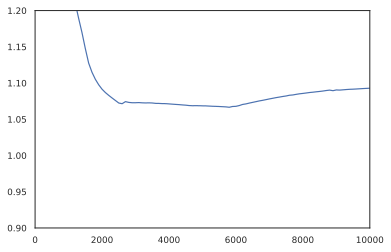

In [40]:
plt.plot(df_lstsq['l1_norm'])
plt.ylim([0.9, 1.2])
plt.xlim([0, 10000])

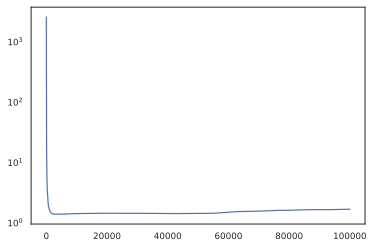

In [43]:
plt.semilogy(df_lstsq['l1_norm'])

In [68]:
(2500 > df_deepmod.index) < 5800

array([ True,  True,  True, ...,  True,  True,  True])

In [45]:
df_lstsq['library_mean'].idxmin()

2300

In [46]:
df_lstsq['Coeff_mean'].idxmin()

5800